In [1]:
import os
os.chdir('../')
print(os.getcwd())

/home/dli/master-project/ynet_adaptive_work


In [2]:
from utils.dataset import *

In [3]:
data_raw='sdd_ynet/dataset_raw' # See README.md on how to download the raw dataset
step=12
window_size=20
stride=20
obs_len=8
data_filter='sdd_ynet/dataset_filter_custom' # Path to new dataset in sdd_ynet directory
labels=['Pedestrian', 'Biker']

In [4]:
os.getcwd()

'/home/dli/master-project/ynet_adaptive_work'

In [6]:
os.chdir('../')

In [213]:
df = load_raw_dataset(data_raw, step, window_size, stride)

In [8]:
df.shape

(465200, 8)

In [9]:
df

,trackId,frame,label,x,y,sceneId,metaId,frame_diff
0,0,10064,Biker,213.0,1067.0,bookstore_0,0,1.0
1,0,10076,Biker,229.0,1035.5,bookstore_0,0,1.0
2,0,10088,Biker,251.0,1008.0,bookstore_0,0,1.0
3,0,10100,Biker,276.5,983.0,bookstore_0,0,1.0
4,0,10112,Biker,306.0,963.0,bookstore_0,0,1.0
...,...,...,...,...,...,...,...,...
465195,7,460,Pedestrian,1922.0,173.0,quad_3,23259,1.0
465196,7,472,Pedestrian,1922.0,173.0,quad_3,23259,1.0
465197,7,484,Pedestrian,1922.0,173.0,quad_3,23259,1.0
465198,7,496,Pedestrian,1922.0,173.0,quad_3,23259,1.0


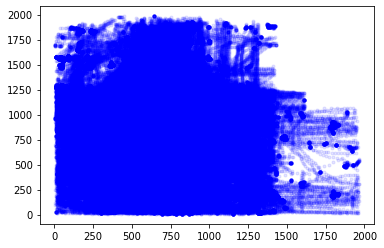

In [48]:
df_b0 = df[df['sceneId'] == 'bookstore_0']
df_b0_grouped = df.groupby('metaId')
for group_key in df_b0_grouped.groups.keys():
    group = df_b0_grouped.get_group(group_key)
    plt.plot(group['x'], group['y'], 'b.', alpha=0.1)

In [22]:
os.getcwd()

'/home/dli/master-project/ynet_adaptive_work'

In [23]:
train_trajnet = pd.read_pickle('./sdd_ynet/ynet_additional_files/train_trajnet.pkl')

In [24]:
train_trajnet

,frame,trackId,x,y,sceneId,metaId
0,0,100,757.0,918.5,bookstore_0,0
1,12,100,765.0,918.5,bookstore_0,0
2,24,100,773.0,918.5,bookstore_0,0
3,36,100,780.5,918.5,bookstore_0,0
4,48,100,788.5,919.5,bookstore_0,0
...,...,...,...,...,...,...
169875,11424,273,89.5,948.5,nexus_9,8493
169876,11436,273,80.0,944.0,nexus_9,8493
169877,11448,273,72.0,940.0,nexus_9,8493
169878,11460,273,64.0,936.0,nexus_9,8493


### Check datasets consistency before and after changes

In [16]:
new, old = [], []
vel_ranges = ['0.25_0.75', '1.25_1.75', '2.25_2.75', '3.25_3.75']
for r in vel_ranges:
    new.append(pd.read_pickle(f'sdd_ynet/dataset_filter/{r}.pkl'))
    old.append(pd.read_pickle(f'sdd_ynet/dataset_filter/dataset_ped_biker/gap/{r}.pkl'))


In [18]:
len(new), len(old)

(4, 4)

In [28]:
for i, _ in enumerate(vel_ranges):
    print(new[i].iloc[:, :-1].equals(old[i].iloc[:, :-1]))

True
True
True
True


In [208]:
varf_list = ['min_dist', 'avg_den', 'tot_den']

In [210]:
[s for s in varf_list if 'den' in s]

['avg_den', 'tot_den']

In [212]:
any('den' in mystring for mystring in varf_list)

True

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
penguins = sns.load_dataset("penguins")

In [32]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


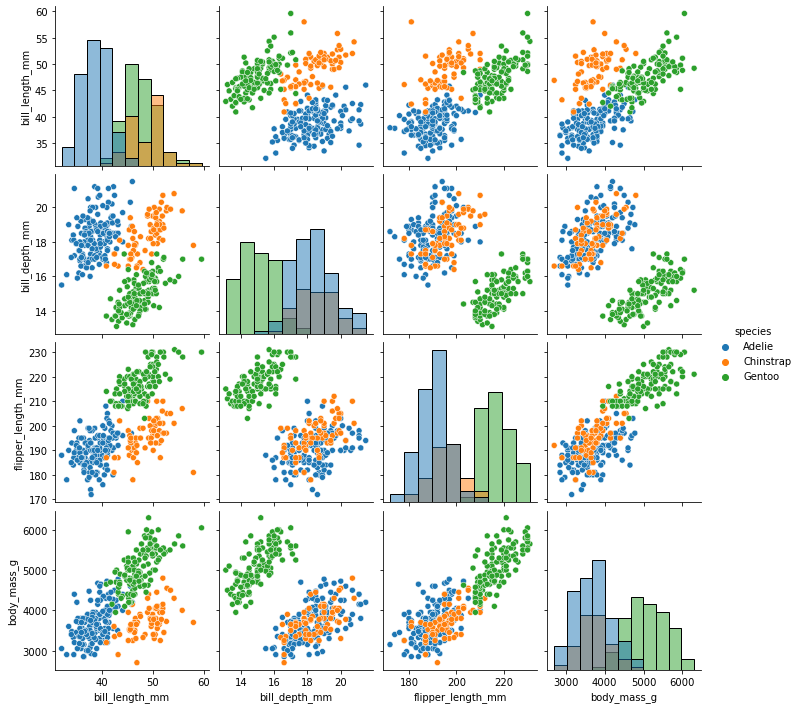

In [31]:
sns.pairplot(penguins, hue="species", diag_kind="hist")

In [5]:
penguins.species.unique(), penguins.sex.unique()

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Male', 'Female', nan], dtype=object))

In [8]:
penguins_valid = penguins[(~penguins.sex.isnull())]

In [9]:
penguins_valid.shape, penguins.shape

((333, 7), (344, 7))

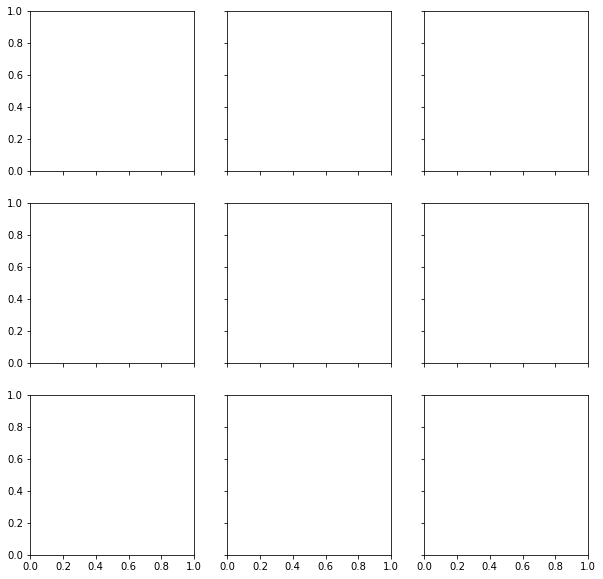

In [12]:
fig, axs = plt.subplots(3,3, figsize=(10,10), sharex=True, sharey=True)

In [15]:
axs[1][1]

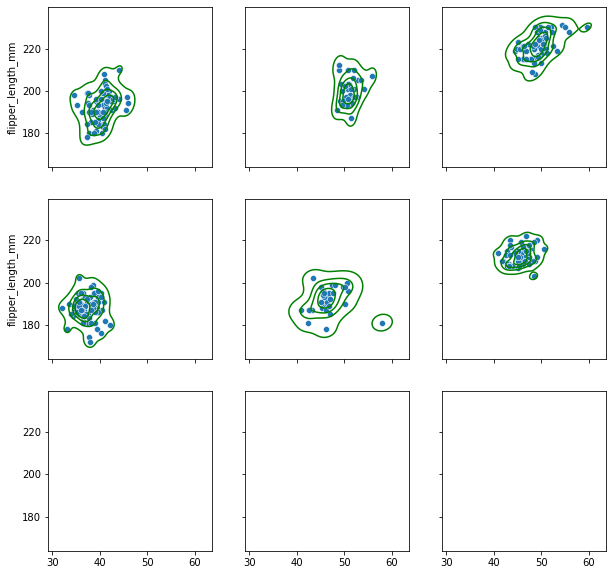

In [24]:
fig, axs = plt.subplots(3,3, figsize=(10,10), sharex=True, sharey=True)
for c, species in enumerate(['Adelie', 'Chinstrap', 'Gentoo']):
    for r, sex in enumerate(['Male', 'Female']):
        d = penguins_valid[(penguins_valid.species == species) & (penguins_valid.sex == sex)]
        sns.scatterplot(x=d.bill_length_mm, y=d.flipper_length_mm, ax=axs[r,c])
        sns.kdeplot(x=d.bill_length_mm, y=d.flipper_length_mm, ax=axs[r,c], 
            levels=5, color='green')
        # axs[r, c].scatter(d.bill_length_mm, d.flipper_length_mm)

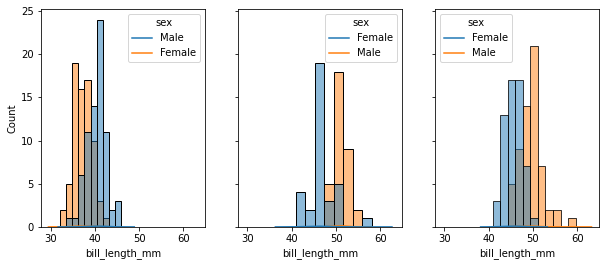

In [40]:
fig, axs = plt.subplots(1,3, figsize=(10, 4), sharex=True, sharey=True)
for c, species in enumerate(['Adelie', 'Chinstrap', 'Gentoo']):
    d = penguins_valid[(penguins_valid.species == species)]
    sns.histplot(data=d, x='bill_length_mm', ax=axs[c], hue='sex', alpha=0.5)
    sns.kdeplot(data=d, x='bill_length_mm', ax=axs[c], hue='sex', levels=5)

### Check dataset statistics

In [5]:
df = pd.read_pickle(os.path.join(data_raw, "data.pkl"))

In [6]:
df.shape

(465200, 10)

In [7]:
465200/20

23260.0

In [8]:
df_varfs = pd.read_pickle(os.path.join(data_raw, "df_varfs.pkl"))

In [9]:
df_varfs.shape

(23260, 32)

In [10]:
df_varfs.head()

,metaId,label,sceneId,scene,avg_vel,max_vel,avg_acc,max_acc,min_acc,abs+avg_acc,...,min_acc_com,abs+avg_acc_com,abs+max_acc_com,min_dist_com,avg_den100_com,tot_den100_com,avg_den50_com,tot_den50_com,avg_den10_com,tot_den10_com
0,0,Biker,bookstore_0,bookstore,2.986981,3.064129,-0.001665,0.009037,-0.009037,0.005102,...,-0.076918,0.025966,0.127397,66.319303,0.50,10,0.00,0,0.0,0
1,1,Biker,bookstore_0,bookstore,3.914014,4.192627,0.000636,0.036924,-0.024498,0.018103,...,-0.084885,0.022929,0.084885,44.553339,0.15,3,0.05,1,0.0,0
2,2,Pedestrian,bookstore_0,bookstore,0.960907,1.185122,-0.015303,0.014277,-0.071084,0.021017,...,-0.071084,0.011697,0.071084,23.706539,0.20,4,0.10,2,0.0,0
3,3,Pedestrian,bookstore_0,bookstore,0.198828,0.333333,-0.001157,0.013889,-0.013889,0.009726,...,-0.020833,0.011476,0.023508,18.248288,3.10,62,1.25,25,0.0,0
4,4,Pedestrian,bookstore_0,bookstore,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.029463,0.005900,0.029463,21.965883,5.15,103,1.20,24,0.0,0


In [14]:
df_varfs.groupby('scene').count()['metaId']

scene
bookstore      3325
coupa          1572
deathCircle    4390
gates          1938
hyang          5568
little          828
nexus          5571
quad             68
Name: metaId, dtype: int64

In [15]:
df_varfs.groupby('label').count()['metaId']

label
Biker          5152
Bus             153
Car            2662
Cart            202
Pedestrian    14860
Skater          231
Name: metaId, dtype: int64

In [16]:
df_varfs.groupby(['label', 'scene']).count()['metaId']

label       scene      
Biker       bookstore       647
            coupa           191
            deathCircle    2008
            gates           861
            hyang          1033
            little          294
            nexus           113
            quad              5
Bus         bookstore         7
            deathCircle      29
            gates            21
            hyang             1
            little           10
            nexus            85
Car         bookstore        17
            deathCircle     347
            gates            33
            hyang            38
            little            2
            nexus          2225
Cart        bookstore        16
            coupa             1
            deathCircle     136
            gates             7
            hyang            26
            nexus            16
Pedestrian  bookstore      2612
            coupa          1378
            deathCircle    1766
            gates           992
            hyan

In [17]:
a = {'a': 1, 'b': 2}
a

{'a': 1, 'b': 2}

In [21]:
def func(a):
    a['b'] = 3

In [22]:
func(a)

In [23]:
a

{'a': 1, 'b': 3, 'c': 3}

## Split agent_type by `scene_id` / `scene_name`

In [2]:
import pickle
import numpy as np
import pandas as pd

In [3]:
df_biker = pd.read_pickle('../data/sdd/filter/agent_type/Biker.pkl')
df_ped =pd.read_pickle('../data/sdd/filter/agent_type/Pedestrian.pkl')

In [4]:
df_ped.shape[0]/20, df_biker.shape[0]/20

(14860.0, 5152.0)

In [5]:
df_ped.loc[:, 'scene'] = df_ped.sceneId.apply(lambda x: x.split('_')[0])
df_biker.loc[:, 'scene'] = df_biker.sceneId.apply(lambda x: x.split('_')[0])

unique_sceneIds_ped = df_ped.sceneId.unique()
unique_scenes_ped = df_ped.scene.unique()

unique_sceneIds_biker = df_biker.sceneId.unique()
unique_scenes_biker = df_biker.scene.unique()

In [6]:
import pathlib

In [7]:
given_scenes = ['deathCircle']
for scene in given_scenes:
    # scene_name 
    df_ped_scene = df_ped[df_ped.scene == scene]
    out_dir = f'../data/sdd/filter/agent_type/{scene}'
    pathlib.Path(out_dir).mkdir(parents=True, exist_ok=True)
    df_ped_scene.to_pickle(f'{out_dir}/Pedestrian.pkl')
    df_biker_scene = df_biker[df_biker.scene == scene]
    df_biker_scene.to_pickle(f'{out_dir}/Biker.pkl')
    print('scene =', scene, '# ped', df_ped_scene.shape[0]/20, '# biker', df_biker_scene.shape[0]/20)
    # scene_id
    for scene_id in unique_sceneIds_ped:
        if scene in scene_id:
            df_ped_scene_id = df_ped[df_ped.sceneId == scene_id]
            out_dir = f'../data/sdd/filter/agent_type/{scene_id}'
            pathlib.Path(out_dir).mkdir(parents=True, exist_ok=True)
            df_ped_scene_id.to_pickle(f'{out_dir}/Pedestrian.pkl')
            print('scene_id =', scene_id, '# ped', df_ped_scene_id.shape[0]/20)
    for scene_id in unique_sceneIds_biker:
        if scene in scene_id:
            df_biker_scene_id = df_biker[df_biker.sceneId == scene_id]
            out_dir = f'../data/sdd/filter/agent_type/{scene_id}'
            df_biker_scene_id.to_pickle(f'{out_dir}/Biker.pkl')
            print('scene_id =', scene_id, '# biker', df_biker_scene_id.shape[0]/20)

scene = deathCircle # ped 1766.0 # biker 2008.0
scene_id = deathCircle_0 # ped 598.0
scene_id = deathCircle_1 # ped 755.0
scene_id = deathCircle_2 # ped 14.0
scene_id = deathCircle_3 # ped 395.0
scene_id = deathCircle_4 # ped 4.0
scene_id = deathCircle_0 # biker 666.0
scene_id = deathCircle_1 # biker 638.0
scene_id = deathCircle_2 # biker 7.0
scene_id = deathCircle_3 # biker 679.0
scene_id = deathCircle_4 # biker 18.0


### Check train and test set scenes

To tell which scenes have been seen in each case.

In [31]:
def reduce_df_meta_ids(df, meta_ids):
    return df[(df["metaId"].values == meta_ids[:, None]).sum(axis=0).astype(bool)]

def split_df(df, val_ratio, n_test=None, shuffle=False):
    # idx
    unique_meta_ids = np.unique(df["metaId"])
    if shuffle:
        print('Shuffling raw data')
        np.random.shuffle(unique_meta_ids)
    n_metaId = unique_meta_ids.shape[0]
    # split
    if n_test:
        val_meta_ids, train_meta_ids, test_meta_ids = np.split(
            unique_meta_ids, [int(val_ratio * n_metaId), n_metaId - n_test])
        df_test = reduce_df_meta_ids(df, test_meta_ids)
    else:
        val_meta_ids, train_meta_ids = np.split(
            unique_meta_ids, [int(val_ratio * len(unique_meta_ids))])
        df_test = None
    df_train = reduce_df_meta_ids(df, train_meta_ids)
    df_val = reduce_df_meta_ids(df, val_meta_ids)
    return df_train, df_val, df_test

In [32]:
df_biker_train, df_val_biker, df_test_biker = split_df(df_biker, 0.1, 500)

In [33]:
print('Unique scenes in train: ', df_biker_train.sceneId.unique())
print('Unique scenes in val: ', df_val_biker.sceneId.unique())
print('Unique scenes in test: ', df_test_biker.sceneId.unique())

Unique scenes in train:  ['bookstore_4' 'bookstore_5' 'bookstore_6' 'coupa_0' 'coupa_1' 'coupa_2'
 'coupa_3' 'deathCircle_0' 'deathCircle_1' 'deathCircle_2' 'deathCircle_3'
 'deathCircle_4' 'gates_0' 'gates_1' 'gates_2' 'gates_3' 'gates_4'
 'gates_5' 'gates_6' 'gates_7' 'gates_8' 'hyang_0' 'hyang_1' 'hyang_10'
 'hyang_11' 'hyang_12' 'hyang_2' 'hyang_3' 'hyang_4' 'hyang_5']
Unique scenes in val:  ['bookstore_0' 'bookstore_1' 'bookstore_2' 'bookstore_3' 'bookstore_4']
Unique scenes in test:  ['hyang_5' 'hyang_6' 'hyang_7' 'hyang_9' 'little_0' 'little_1' 'little_2'
 'little_3' 'nexus_0' 'nexus_1' 'nexus_10' 'nexus_11' 'nexus_2' 'nexus_4'
 'nexus_5' 'nexus_6' 'nexus_7' 'nexus_8' 'nexus_9' 'quad_0' 'quad_1']


## Calculate data ratio

In [1]:
num = {'Biker': 5152, 'Bus': 153, 'Car': 2662, 'Cart': 202, 'Pedestrian': 14860, 'Skater': 231}

In [10]:
tot = np.array(list(num.values())).sum()
for k, v in num.items():
    print(k, round(v/tot, 2))

Biker 0.22
Bus 0.01
Car 0.11
Cart 0.01
Pedestrian 0.64
Skater 0.01


In [9]:
import numpy as np
np.array(list(num.values())).sum()


23260

## Plot biker and pedestrian heatmap

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df_biker = pd.read_pickle('/data/dli-data/sdd/filter/agent_type/Biker.pkl')
df_ped =pd.read_pickle('/data/dli-data/sdd/filter/agent_type/Pedestrian.pkl')

In [3]:
df_ped.shape[0]/20, df_biker.shape[0]/20

(14860.0, 5152.0)

In [4]:
df_dc_biker = df_biker[df_biker.sceneId == 'deathCircle_0']
df_dc_ped = df_ped[df_ped.sceneId == 'deathCircle_0']

In [5]:
df_dc_biker.shape, df_dc_ped.shape, df_dc_biker.shape[0]/20, df_dc_ped.shape[0]/20

((13320, 9), (11960, 9), 666.0, 598.0)

In [6]:
import os
import cv2
def create_images_dict(unique_scene, image_path, image_file='reference.jpg', use_raw_data=False):
    images = {}
    for scene in unique_scene:
        if image_file == 'oracle.png':
            im = cv2.imread(os.path.join(image_path, scene, image_file), 0)
        else:
            if use_raw_data:
                scene_name, scene_idx = scene.split("_")
                im_path = os.path.join(
                    image_path, scene_name, f"video{scene_idx}", image_file)
            else:
                im_path = os.path.join(image_path, scene, image_file)
            im = cv2.imread(im_path)
        images[scene] = im
    # images channel: blue, green, red 
    return images

In [7]:
image_path = '/data/dli-data/sdd/raw/annotations'
scene_images = create_images_dict(['deathCircle_0'], image_path, 'reference.jpg', True)

In [8]:
dc = scene_images['deathCircle_0']

In [29]:
def get_correct_scene_img(input, c_place=-1):
    if c_place == -1:
        height, width, _ = input.shape
        blue, green, red = input[:,:,0], input[:,:,1], input[:,:,2]
    elif c_place == 0:
        _, height, width = input.shape
        blue, green, red = input[0], input[1], input[2]
    else:
        raise ValueError
    scene_img = np.empty((height, width, 3))
    scene_img[:, :, 0] = red
    scene_img[:, :, 1] = green 
    scene_img[:, :, 2] = blue 
    scene_img = (scene_img - input.min()) / (input.max() - input.min())
    return scene_img 


In [30]:
dc = get_correct_scene_img(dc, c_place=-1)

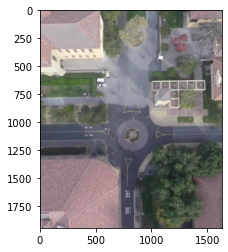

In [31]:
plt.imshow(dc)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
dc.shape

(1948, 1630, 3)

In [10]:
height, width, _ = dc.shape
print('Original size:', height, width)
while height >= 10:
    height /= 2
    width /= 2
print('Plot size:', height, width)

Original size: 1948 1630
Plot size: 7.609375 6.3671875


In [40]:
x_biker = df_dc_biker.x.values
y_biker = df_dc_biker.y.values 
print('Biker:', x_biker.max(), y_biker.max())
x_ped = df_dc_ped.x.values
y_ped = df_dc_ped.y.values
print('Ped:', x_ped.max(), y_ped.max())

Biker: 1615.0 1923.0
Ped: 1611.5 1923.0


In [11]:
import seaborn as sns

[]

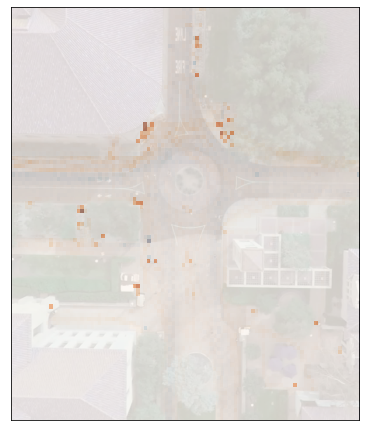

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(width, height))
ax.imshow(dc)
ax.hist2d(x_biker, y_biker, bins=100, alpha=0.5, cmap='Blues')
ax.hist2d(x_ped, y_ped, bins=100, alpha=0.5, cmap='Oranges')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])


In [46]:
df_dc_biker['val'] = 1
df_dc_biker.head()

/tmp/ipykernel_26057/665039343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc_biker['val'] = 1


,trackId,frame,label,x,y,sceneId,metaId,frame_diff,dist,val
98080,5,7591,Biker,471.5,874.5,deathCircle_0,4904,1.0,"[730.8387305007857, 474.41859154126746, 651.56...",1
98081,5,7603,Biker,478.5,857.5,deathCircle_0,4904,1.0,"[741.9529971635669, 448.4484362777955, 643.268...",1
98082,5,7615,Biker,485.5,845.5,deathCircle_0,4904,1.0,"[746.4236397649796, 428.981351576033, 563.8734...",1
98083,5,7627,Biker,491.5,837.5,deathCircle_0,4904,1.0,"[747.7006419684284, 414.0160021061988, 540.201...",1
98084,5,7639,Biker,498.5,837.5,deathCircle_0,4904,1.0,"[745.8124764309055, 389.6013988681252, 514.263...",1


In [50]:
df_dc_ped['val'] = 2
df_dc_ped.head()

/tmp/ipykernel_26057/3550542896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc_ped['val'] = 2


,trackId,frame,label,x,y,sceneId,metaId,frame_diff,dist,val
97940,2,8159,Pedestrian,979.5,52.5,deathCircle_0,4897,1.0,"[952.6310933409637, 1151.46689053572, 1317.038...",2
97941,2,8171,Pedestrian,979.5,64.5,deathCircle_0,4897,1.0,"[955.117401160716, 1146.2233639217097, 1311.13...",2
97942,2,8183,Pedestrian,979.5,80.5,deathCircle_0,4897,1.0,"[957.6351079612735, 1133.7940730132611, 1304.7...",2
97943,2,8195,Pedestrian,979.5,92.5,deathCircle_0,4897,1.0,"[961.1431995285614, 1125.4670141767817, 1302.8...",2
97944,2,8207,Pedestrian,979.5,101.0,deathCircle_0,4897,1.0,"[967.6421084264574, 1121.8205070330994, 1300.9...",2


In [12]:
df_dc = pd.concat([df_dc_biker, df_dc_ped], axis=0)
df_dc.head()

,trackId,frame,label,x,y,sceneId,metaId,frame_diff,dist
98080,5,7591,Biker,471.5,874.5,deathCircle_0,4904,1.0,"[730.8387305007857, 474.41859154126746, 651.56..."
98081,5,7603,Biker,478.5,857.5,deathCircle_0,4904,1.0,"[741.9529971635669, 448.4484362777955, 643.268..."
98082,5,7615,Biker,485.5,845.5,deathCircle_0,4904,1.0,"[746.4236397649796, 428.981351576033, 563.8734..."
98083,5,7627,Biker,491.5,837.5,deathCircle_0,4904,1.0,"[747.7006419684284, 414.0160021061988, 540.201..."
98084,5,7639,Biker,498.5,837.5,deathCircle_0,4904,1.0,"[745.8124764309055, 389.6013988681252, 514.263..."


[]

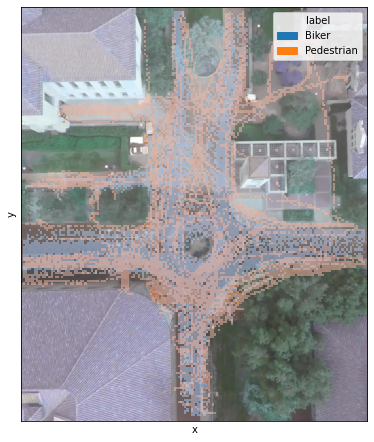

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(width, height))
ax.imshow(dc)
sns.histplot(
    df_dc, x='x', y='y', hue='label', 
    binwidth=10, alpha=0.5, stat='density')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])


In [13]:
def move_outwards(df, move=1):
    df_moved = pd.DataFrame()
    df = df[['x_grid', 'y_grid', 'metaId']].rename(columns={'x_grid': 'x', 'y_grid': 'y'})
    if isinstance(move, int):
        move_x, move_y = move, move 
    elif isinstance(move, dict):
        move_x, move_y = move['x'], move['y']
    else:
        raise NotImplementedError
    # move left
    df_temp = df.copy()
    df_temp.x = df_temp.x - move_x
    df_moved = pd.concat([df_moved, df_temp], axis=0)
    # move right
    df_temp = df.copy()
    df_temp.x = df_temp.x + move_x
    df_moved = pd.concat([df_moved, df_temp], axis=0)
    # move up
    df_temp = df.copy()
    df_temp.y = df_temp.y - move_y
    df_moved = pd.concat([df_moved, df_temp], axis=0)
    # move down 
    df_temp = df.copy()
    df_temp.y = df_temp.y + move_y
    df_moved = pd.concat([df_moved, df_temp], axis=0)
    # move upper left
    df_temp = df.copy()
    df_temp.x = df_temp.x - move_x
    df_temp.y = df_temp.y - move_y
    df_moved = pd.concat([df_moved, df_temp], axis=0)
    # move upper right
    df_temp = df.copy()
    df_temp.x = df_temp.x + move_x
    df_temp.y = df_temp.y - move_y
    df_moved = pd.concat([df_moved, df_temp], axis=0)
    # move lower left 
    df_temp = df.copy()
    df_temp.x = df_temp.x - move_x
    df_temp.y = df_temp.y + move_y
    df_moved = pd.concat([df_moved, df_temp], axis=0)
    # move lower right  
    df_temp = df.copy()
    df_temp.x = df_temp.x + move_x
    df_temp.y = df_temp.y + move_y
    df_moved = pd.concat([df_moved, df_temp], axis=0)
    return df_moved


In [85]:
move_outwards(df_dc_biker.iloc[:1])

,x,y,metaId
98080,470,874,4904
98080,472,874,4904
98080,471,873,4904
98080,471,875,4904
98080,470,873,4904
98080,472,873,4904
98080,470,875,4904
98080,472,875,4904


In [68]:
df_dc_biker.iloc[:1]

,trackId,frame,label,x,y,sceneId,metaId,frame_diff,dist,x_grid,y_grid
98080,5,7591,Biker,471.5,874.5,deathCircle_0,4904,1.0,"[730.8387305007857, 474.41859154126746, 651.56...",471,874


In [15]:
df_dc_biker['x_grid'] = df_dc_biker.x.values.astype(int)
df_dc_biker['y_grid'] = df_dc_biker.y.values.astype(int)
df_dc_ped['x_grid'] = df_dc_ped.x.values.astype(int)
df_dc_ped['y_grid'] = df_dc_ped.y.values.astype(int)
df_dc_biker.head(), df_dc_ped.head()

/tmp/ipykernel_506160/2206555822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc_biker['x_grid'] = df_dc_biker.x.values.astype(int)
/tmp/ipykernel_506160/2206555822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc_biker['y_grid'] = df_dc_biker.y.values.astype(int)
/tmp/ipykernel_506160/2206555822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

(       trackId  frame  label      x      y        sceneId  metaId  frame_diff  \
 98080        5   7591  Biker  471.5  874.5  deathCircle_0    4904         1.0   
 98081        5   7603  Biker  478.5  857.5  deathCircle_0    4904         1.0   
 98082        5   7615  Biker  485.5  845.5  deathCircle_0    4904         1.0   
 98083        5   7627  Biker  491.5  837.5  deathCircle_0    4904         1.0   
 98084        5   7639  Biker  498.5  837.5  deathCircle_0    4904         1.0   
 
                                                     dist  x_grid  y_grid  
 98080  [730.8387305007857, 474.41859154126746, 651.56...     471     874  
 98081  [741.9529971635669, 448.4484362777955, 643.268...     478     857  
 98082  [746.4236397649796, 428.981351576033, 563.8734...     485     845  
 98083  [747.7006419684284, 414.0160021061988, 540.201...     491     837  
 98084  [745.8124764309055, 389.6013988681252, 514.263...     498     837  ,
        trackId  frame       label      x      y 

In [102]:
# expand pixel given radius 
radius = 1
df_moved = df_dc_biker[['x_grid', 'y_grid', 'metaId']].rename(columns={'x_grid': 'x', 'y_grid': 'y'})
for r in range(1, radius+1):
    df_temp = move_outwards(df_dc_biker, r)
    df_moved = pd.concat([df_moved, df_temp], axis=0)
df_moved = df_moved.reset_index(drop=True)
# delete those outside image scope 
df_moved_cleaned = df_moved[(df_moved.x >= 0) & (df_moved.x < dc.shape[1]) & (df_moved.y >= 0) & (df_moved.y < dc.shape[0])]

In [16]:
# expand pixel to next block 
bins = 100
move_x = int(np.ceil(dc.shape[1] / bins))
move_y = int(np.ceil(dc.shape[0] / bins))
df_biker_moved = pd.concat([
    df_dc_biker[['x_grid', 'y_grid', 'metaId']].rename(columns={'x_grid': 'x', 'y_grid': 'y'}), 
    move_outwards(df_dc_biker, {'x': move_x, 'y': move_y})], axis=0).reset_index(drop=True)
df_ped_moved = pd.concat([
    df_dc_ped[['x_grid', 'y_grid', 'metaId']].rename(columns={'x_grid': 'x', 'y_grid': 'y'}), 
    move_outwards(df_dc_ped, {'x': move_x, 'y': move_y})], axis=0).reset_index(drop=True)
# delete those outside image scope 
df_biker_moved = df_biker_moved[(df_biker_moved.x >= 0) & (df_biker_moved.x < dc.shape[1]) & \
    (df_biker_moved.y >= 0) & (df_biker_moved.y < dc.shape[0])]
df_ped_moved = df_ped_moved[(df_ped_moved.x >= 0) & (df_ped_moved.x < dc.shape[1]) & \
    (df_ped_moved.y >= 0) & (df_ped_moved.y < dc.shape[0])]

In [17]:
df_biker_moved.shape, df_ped_moved.shape

((119766, 3), (107598, 3))

In [18]:
def plot_heatmap_seperate(
    scene_img, df_biker, df_ped, 
    cmap_biker, cmap_ped, width, height, 
    bins=100, out_dir=None, out_name=None):
    fig, axes = plt.subplots(1, 2, figsize=(width*2, height))

    axes[0].imshow(scene_img)
    sns.histplot(df_biker, x='x', y='y', bins=bins, ax=axes[0], cmap=cmap_biker)
    axes[0].set_title('Biker')
    axes[0].set_yticklabels([])
    axes[0].set_xticklabels([])
    axes[0].set_xticks([])
    axes[0].set_yticks([])

    axes[1].imshow(scene_img)
    sns.histplot(df_ped, x='x', y='y', bins=bins, ax=axes[1], cmap=cmap_ped)
    axes[1].set_title('Pedestrian')
    axes[1].set_yticklabels([])
    axes[1].set_xticklabels([])
    axes[1].set_xticks([])
    axes[1].set_yticks([])

    if out_dir is not None:
        if out_name is None: out_name = 'bp_dist_seperate.png'
        plt.savefig(f'{out_dir}/{out_name}')


def plot_heatmap_together(
    scene_img, df_biker, df_ped, 
    cmap_biker, cmap_ped, width, height, 
    bins=100, out_dir=None, out_name=None):
    fig, ax = plt.subplots(1, 1, figsize=(width, height))

    ax.imshow(scene_img)
    sns.histplot(df_biker, x='x', y='y', bins=bins, ax=ax, cmap=cmap_biker)
    sns.histplot(df_ped, x='x', y='y', bins=bins, ax=ax, cmap=cmap_ped)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])

    if out_dir is not None:
        if out_name is None: out_name = 'bp_dist_together.png'
        plt.savefig(f'{out_dir}/{out_name}')

In [23]:
import matplotlib as mpl

In [19]:
def get_cmap(given_cmap='Blues'):
    dark = mpl.cm.get_cmap(given_cmap, 500)
    light = mpl.cm.get_cmap(given_cmap, 100)
    bottom = light(np.linspace(0, 0.25, 20))
    bottom[:, -1] = 0.1
    middle = light(np.linspace(0.25, 0.5, 36))
    middle[:, -1] = 0.3
    up = dark(np.linspace(0.5, 1, 200))
    my_colors = np.vstack((bottom, middle, up))
    my_cmap = mpl.colors.ListedColormap(my_colors, name='my_cmap')
    return my_cmap 

def get_orange():
    dark = mpl.cm.get_cmap('Oranges', 500)
    light = mpl.cm.get_cmap('Oranges', 100)
    bottom = light(np.linspace(0, 0.25, 20))
    bottom[:, -1] = 0.1
    middle = light(np.linspace(0.25, 0.5, 50))
    middle[:, -1] = 0.4
    up = dark(np.linspace(0.5, 1, 184))
    my_colors = np.vstack((bottom, middle, up))
    my_cmap = mpl.colors.ListedColormap(my_colors, name='my_orange')
    return my_cmap 

def get_blue():
    dark = mpl.cm.get_cmap('Blues', 500)
    light = mpl.cm.get_cmap('Blues', 100)
    bottom = light(np.linspace(0, 0.25, 10))
    bottom[:, -1] = 0.1
    middle = light(np.linspace(0.25, 0.5, 36))
    middle[:, -1] = 0.5
    up = dark(np.linspace(0.5, 1, 210))
    my_colors = np.vstack((bottom, middle, up))
    my_cmap = mpl.colors.ListedColormap(my_colors, name='my_blue')
    return my_cmap 

In [51]:
def get_orange():
    dark = mpl.cm.get_cmap('Oranges', 500)
    light = mpl.cm.get_cmap('Oranges', 100)
    bottom = light(np.linspace(0, 0.25, 70))
    bottom[:, -1] = 0.5
    up = dark(np.linspace(0.5, 1, 184))
    up[:, -1] = 0.5
    my_colors = np.vstack((bottom, up))
    my_cmap = mpl.colors.ListedColormap(my_colors, name='my_orange')
    return my_cmap 

def get_blue():
    dark = mpl.cm.get_cmap('Blues', 500)
    light = mpl.cm.get_cmap('Blues', 100)
    bottom = light(np.linspace(0, 0.3, 20))
    bottom[:, -1] = 0.1
    up = dark(np.linspace(0.3, 1, 236))
    my_colors = np.vstack((bottom, up))
    my_cmap = mpl.colors.ListedColormap(my_colors, name='my_blue')
    return my_cmap 

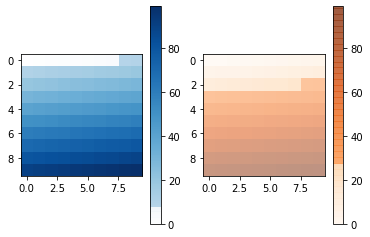

In [52]:
cmap_blue = get_blue()
cmap_orange = get_orange()

aa = np.arange(100).reshape(10, 10)
fig, axes = plt.subplots(1, 2)
im = axes[0].imshow(aa, cmap=cmap_blue)
plt.colorbar(im, ax=axes[0])
im = axes[1].imshow(aa, cmap=cmap_orange)
plt.colorbar(im, ax=axes[1])

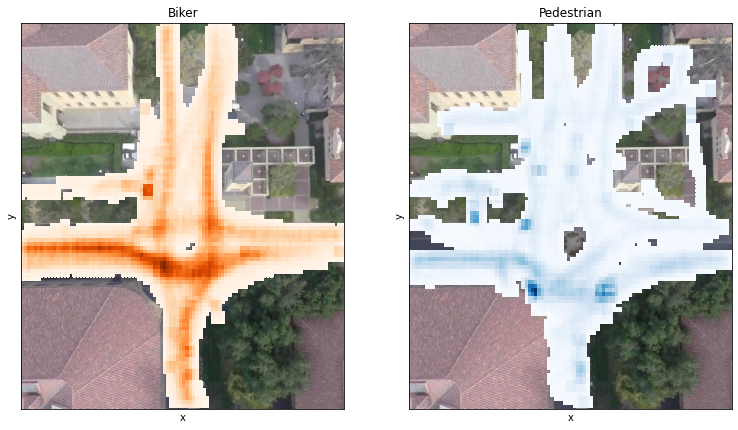

In [50]:
plot_heatmap_seperate(
    scene_img=dc, df_biker=df_biker_moved, df_ped=df_ped_moved, 
    cmap_biker='Oranges', cmap_ped='Blues', width=width, height=height, bins=bins, 
    out_dir='./', out_name='seperate.png')

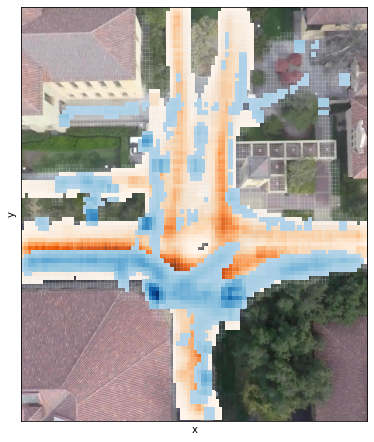

In [53]:
plot_heatmap_together(
    scene_img=dc, df_biker=df_biker_moved, df_ped=df_ped_moved, 
    cmap_biker='Oranges', cmap_ped=cmap_blue, width=width, height=height, bins=bins, 
    out_dir='./', out_name='together_low_threshold.png')

In [104]:
df_moved_cleaned['v'] = 1
df_gb = df_moved_cleaned.groupby(['x', 'y'])['v'].count().reset_index()

In [105]:
df_gb.head()

,x,y,v
0,9,1232,1
1,9,1233,1
2,9,1234,1
3,10,1211,1
4,10,1212,1


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(width*2, height))

axes[0].imshow(dc)
sns.histplot(df_moved_cleaned, x='x', y='y', bins=80, alpha=0.5, ax=axes[0])
axes[0].set_title('Biker')
axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
axes[0].set_xticks([])
axes[0].set_yticks([])

In [110]:
print('Total coords combination:', df_gb.shape[0])
for i in range(10):
    print(i, (df_gb.sort_values(by=['v'])['v'] <= i).sum())

Total coords combination: 102411
0 0
1 89056
2 100505
3 101930
4 102211
5 102265
6 102277
7 102306
8 102313
9 102316


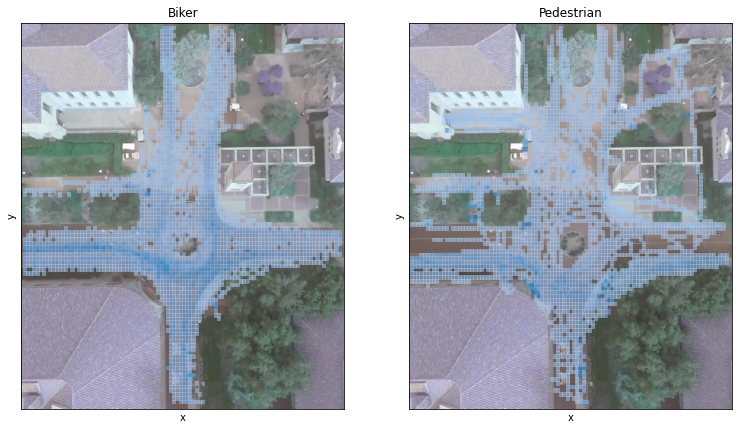

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(width*2, height))

axes[0].imshow(dc)
axes[1].imshow(dc)
sns.histplot(
    df_dc_biker, x='x', y='y',
    bins=100, alpha=0.5, ax=axes[0])
axes[0].set_title('Biker')
axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
axes[0].set_xticks([])
axes[0].set_yticks([])

sns.histplot(
    df_dc_ped, x='x', y='y', 
    bins=100, alpha=0.5, ax=axes[1])
axes[1].set_title('Pedestrian')
axes[1].set_yticklabels([]) 
axes[1].set_xticklabels([])
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.savefig('r0.png')


In [204]:
def get_cmap(given_cmap='Blues'):
    dark = mpl.cm.get_cmap(given_cmap, 500)
    light = mpl.cm.get_cmap(given_cmap, 100)
    bottom = light(np.linspace(0, 0.4, 20))
    bottom[:, -1] = 0.1
    middle = light(np.linspace(0.4, 0.8, 36))
    middle[:, -1] = 0.3
    up = dark(np.linspace(0.8, 1, 200))
    up[:, -1] = 0.5
    my_colors = np.vstack((bottom, middle, up))
    my_cmap = mpl.colors.ListedColormap(my_colors, name='my_cmap')
    return my_cmap 

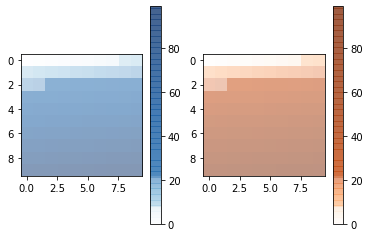

In [206]:
cmap_blue = get_cmap('Blues')
cmap_orange = get_cmap('Oranges')

aa = np.arange(100).reshape(10, 10)
fig, axes = plt.subplots(1, 2)
im = axes[0].imshow(aa, cmap=cmap_blue)
plt.colorbar(im, ax=axes[0])
im = axes[1].imshow(aa, cmap=cmap_orange)
plt.colorbar(im, ax=axes[1])

[]

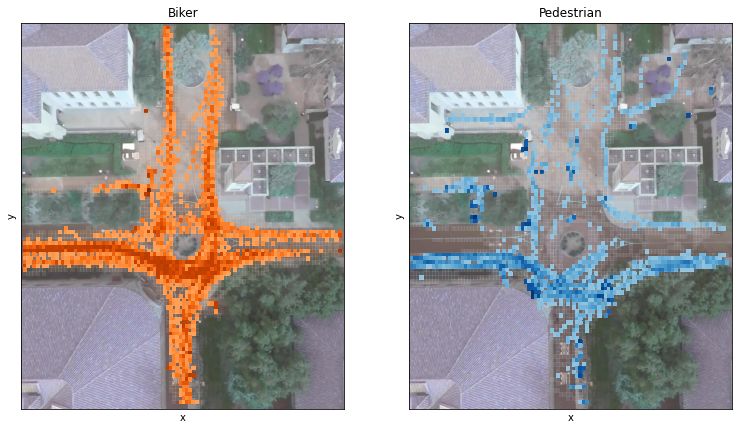

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(width*2, height))

axes[0].imshow(dc)
axes[1].imshow(dc)
sns.histplot(
    df_dc_biker, x='x', y='y',
    bins=100, ax=axes[0], cmap=cmap_orange)
axes[0].set_title('Biker')
axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
axes[0].set_xticks([])
axes[0].set_yticks([])

sns.histplot(
    df_dc_ped, x='x', y='y', 
    bins=100, ax=axes[1], cmap=cmap_blue)
axes[1].set_title('Pedestrian')
axes[1].set_yticklabels([]) 
axes[1].set_xticklabels([])
axes[1].set_xticks([])
axes[1].set_yticks([])

# plt.savefig('r0.png')


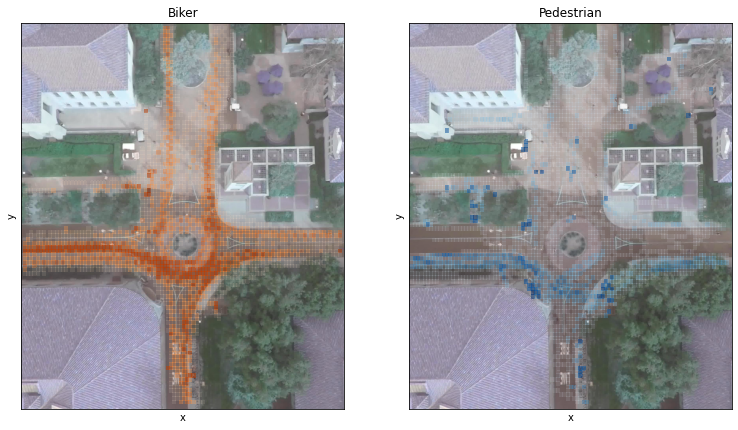

In [212]:
fig, axes = plt.subplots(1, 2, figsize=(width*2, height))

axes[0].imshow(dc)
axes[1].imshow(dc)
sns.histplot(
    df_dc_biker, x='x', y='y',
    bins=100, ax=axes[0], cmap=cmap_orange)
axes[0].set_title('Biker')
axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
axes[0].set_xticks([])
axes[0].set_yticks([])

sns.histplot(
    df_dc_ped, x='x', y='y', 
    bins=100, ax=axes[1], cmap=cmap_blue)
axes[1].set_title('Pedestrian')
axes[1].set_yticklabels([]) 
axes[1].set_xticklabels([])
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.savefig('r0.png')

[]

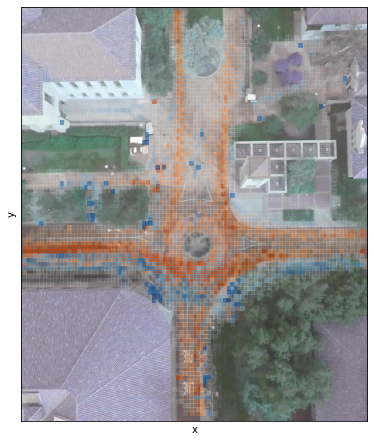

In [208]:
fig, ax = plt.subplots(1, 1, figsize=(width, height))
ax.imshow(dc)
sns.histplot(
    df_dc_biker, x='x', y='y', ax=ax,
    bins=100, stat='density', cmap=cmap_orange)
sns.histplot(
    df_dc_ped, x='x', y='y', ax=ax,
    bins=100, stat='density', cmap=cmap_blue)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

In [165]:
df_dc_biker['x_grid'] = df_dc_biker.x.values.astype(int)
df_dc_biker['y_grid'] = df_dc_biker.y.values.astype(int)
df_dc_ped['x_grid'] = df_dc_ped.x.values.astype(int)
df_dc_ped['y_grid'] = df_dc_ped.y.values.astype(int)
df_dc_biker.head(), df_dc_ped.head()

/tmp/ipykernel_472802/2206555822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc_biker['x_grid'] = df_dc_biker.x.values.astype(int)
/tmp/ipykernel_472802/2206555822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dc_biker['y_grid'] = df_dc_biker.y.values.astype(int)
/tmp/ipykernel_472802/2206555822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

(       trackId  frame  label      x      y        sceneId  metaId  frame_diff  \
 98080        5   7591  Biker  471.5  874.5  deathCircle_0    4904         1.0   
 98081        5   7603  Biker  478.5  857.5  deathCircle_0    4904         1.0   
 98082        5   7615  Biker  485.5  845.5  deathCircle_0    4904         1.0   
 98083        5   7627  Biker  491.5  837.5  deathCircle_0    4904         1.0   
 98084        5   7639  Biker  498.5  837.5  deathCircle_0    4904         1.0   
 
                                                     dist  x_grid  y_grid  
 98080  [730.8387305007857, 474.41859154126746, 651.56...     471     874  
 98081  [741.9529971635669, 448.4484362777955, 643.268...     478     857  
 98082  [746.4236397649796, 428.981351576033, 563.8734...     485     845  
 98083  [747.7006419684284, 414.0160021061988, 540.201...     491     837  
 98084  [745.8124764309055, 389.6013988681252, 514.263...     498     837  ,
        trackId  frame       label      x      y 

In [114]:
df_dc_biker_grid = df_dc_biker.groupby(by=['x_grid', 'y_grid']).count()['metaId'].reset_index()
df_dc_ped_grid = df_dc_ped.groupby(by=['x_grid', 'y_grid']).count()['metaId'].reset_index()


In [74]:
dc.shape

(1948, 1630, 3)

In [78]:
biker_grid = np.zeros((dc.shape[0], dc.shape[1]))
for _, row in df_dc_biker_grid.iterrows():
    x, y, v = row['x_grid'], row['y_grid'], row['metaId']
    biker_grid[y, x] = v

In [115]:
df_dc_biker_grid.shape, df_dc_ped_grid.shape

((12468, 3), (10134, 3))

In [112]:
(biker_grid != 0).sum()

12468

In [100]:
from numpy import linspace, meshgrid
xi = np.arange(dc.shape[1])
yi = np.arange(dc.shape[0])
X, Y = meshgrid(xi, yi)
X.shape, Y.shape

((1948, 1630), (1948, 1630))

In [127]:
df_dc_ped_grid.metaId.value_counts()

1     9653
2      302
3       58
4       24
5       22
6        9
10       6
40       6
7        5
9        5
28       4
20       4
15       3
13       3
16       3
24       3
11       3
8        3
21       3
19       2
18       2
25       2
12       1
31       1
32       1
23       1
41       1
14       1
33       1
26       1
37       1
Name: metaId, dtype: int64

In [126]:
df_dc_biker_grid.metaId.value_counts()

1     11884
2       513
3        36
4        19
5         3
15        2
22        2
7         2
9         1
6         1
8         1
46        1
14        1
12        1
28        1
Name: metaId, dtype: int64

<AxesSubplot:xlabel='x_grid', ylabel='y_grid'>

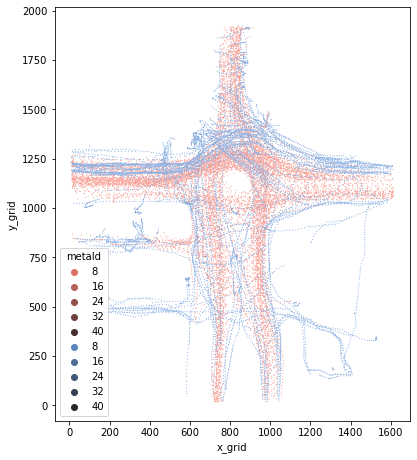

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(width, height))
sns.scatterplot(data=df_dc_biker_grid, x="x_grid", y="y_grid", hue="metaId", s=1, palette='dark:salmon_r', ax=ax)
sns.scatterplot(data=df_dc_ped_grid, x="x_grid", y="y_grid", hue="metaId", s=1, palette=sns.dark_palette("#69d", reverse=True, as_cmap=True), ax=ax)

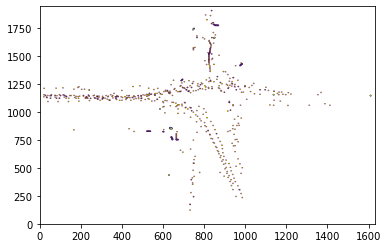

In [129]:
plt.contour(X, Y, biker_grid, levels=[1, 2, 5, 10])
plt.contourf(X, Y, biker_grid, levels=[1, 2, 5, 10], colors=['yellow', 'orange', 'red', 'purple'])

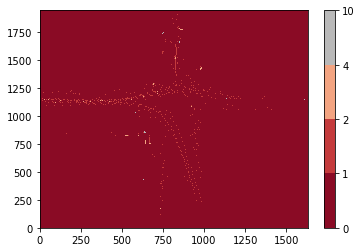

In [137]:
plt.contourf(X, Y, biker_grid, levels=[0,1,2,4,10], cmap='RdGy')
plt.colorbar()

Text(0.5, 1.0, 'Simplest default with labels')

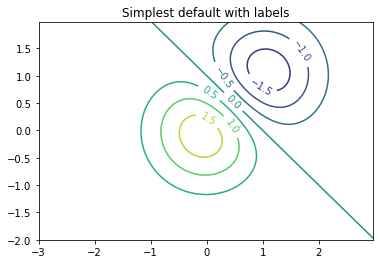

In [97]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')

In [154]:
def plot_trajectories_scenes_overlay(image_path, df_biker, df_ped, out_dir='../', format='png'):
    unique_scene = list(set(df_biker.sceneId.unique()).intersection(set(df_ped.sceneId.unique())))
    scene_images = create_images_dict(unique_scene, image_path, 'reference.jpg', True)
    for scene_id in unique_scene:
        print(f'Plotting {scene_id}')
        scene_biker = df_biker[df_biker.sceneId == scene_id]
        scene_ped = df_ped[df_ped.sceneId == scene_id]
        height, width = scene_images[scene_id].shape[0], scene_images[scene_id].shape[1]
        fig = plt.figure(figsize=(height/50, width/50))
        plt.imshow(scene_images[scene_id])
        ms, lw = 3, 2
        for _, traj in scene_biker.groupby('metaId'):
            plt.plot(traj.x, traj.y, '.-', c='r', ms=ms, linewidth=lw, alpha=0.2)
        plt.plot(0,0,'r-', alpha=0.5, label='Biker')

        for _, traj in scene_ped.groupby('metaId'):
            plt.plot(traj.x, traj.y, '.-', c='b', ms=ms, linewidth=lw, alpha=0.2)
        plt.plot(0,0,'b-', alpha=0.5, label='Pedestrian')

        plt.plot(0,0,'w')
        plt.legend(fontsize=40)
        pathlib.Path(out_dir).mkdir(parents=True, exist_ok=True)
        out_path = os.path.join(out_dir, scene_id + '.' + format)
        plt.savefig(out_path, bbox_inches='tight')
        plt.close(fig)
        print(f'Saved {out_path}')

In [155]:
plot_trajectories_scenes_overlay(image_path, df_dc_biker, df_dc_ped)

Plotting deathCircle_0
Saved ../deathCircle_0.png
